#### Dijkstra

In [ ]:
from collections import defaultdict

#Class to represent a graph
class Graph:

    # find the vertex with minimum dist value, from the set of vertices still in queue
    def minDistance(self,dist,queue):
        # Initialize min value and min_index as -1
        minimum = float("Inf")
        min_index = -1
        
        # from the dist array,pick one which has min value and is till in queue
        for i in range(len(dist)):
            if dist[i] < minimum and i in queue:
                minimum = dist[i]
                min_index = i
        return min_index


    # Function to print shortest path from source to j using parent array
    def printPath(self, parent, j):
        
        #Base Case : If j is source
        if parent[j] == -1 :
            print(j,end=" ")
            return
        self.printPath(parent , parent[j])
        print (j,end=" ")
    
    def get_Path(self, parent, j, p):
        #Base Case : If j is source
        if parent[j] == -1 :
            p.append(j)
            return p
        self.get_Path(parent , parent[j], p)
        p.append(j)
        

    # print the distance array
    def printSolution_and_return_path(self, dist, parent, dest):
        src = 0
        # print("Vertex \t\t Distance \t\t Path")
        for i in range(1, len(dist)):
            if i == dest:
                # print("\n%d --> %d \t %d \t " % (src, i, dist[i]),end=" ")
                # print(parent)
                # self.printPath(parent,i)
                p = []
                self.get_Path(parent,i, p)
                return p



    # Dijkstra's shortest path algorithm 
    # input: a graph represented using adjacency matrix

    def dijkstra(self, graph, src, dest):

        row = len(graph)
        col = len(graph[0])

        # The output array. dist[i] will hold the shortest distance from src to i
        # Initialize all distances as INFINITE
        dist = [float("Inf")] * row

        #Parent array to store shortest path tree
        parent = [-1] * row

        # Distance of source vertex from itself is always 0
        dist[src] = 0

        # Add all vertices in queue
        queue = []
        for i in range(row):
            queue.append(i)
            
        #Find shortest path for all vertices
        while queue:

            # Pick the minimum dist vertex from the set of vertices still in queue
            u = self.minDistance(dist,queue)

            # remove min element	
            queue.remove(u)

            # Update dist value and parent index of the adjacent vertices of the picked vertex. 
            # Consider only those vertices which are still in queue
            for i in range(col):
                # Update dist[i] only if it is in queue, there is an edge from u to i, and total weight of path from src to i through u is smaller than current value of dist[i]
                if graph[u][i] and i in queue:
                    if dist[u] + graph[u][i] < dist[i]:
                        dist[i] = dist[u] + graph[u][i]
                        parent[i] = u


        # print the constructed distance array
        p = self.printSolution_and_return_path(dist,parent, dest)
        return p

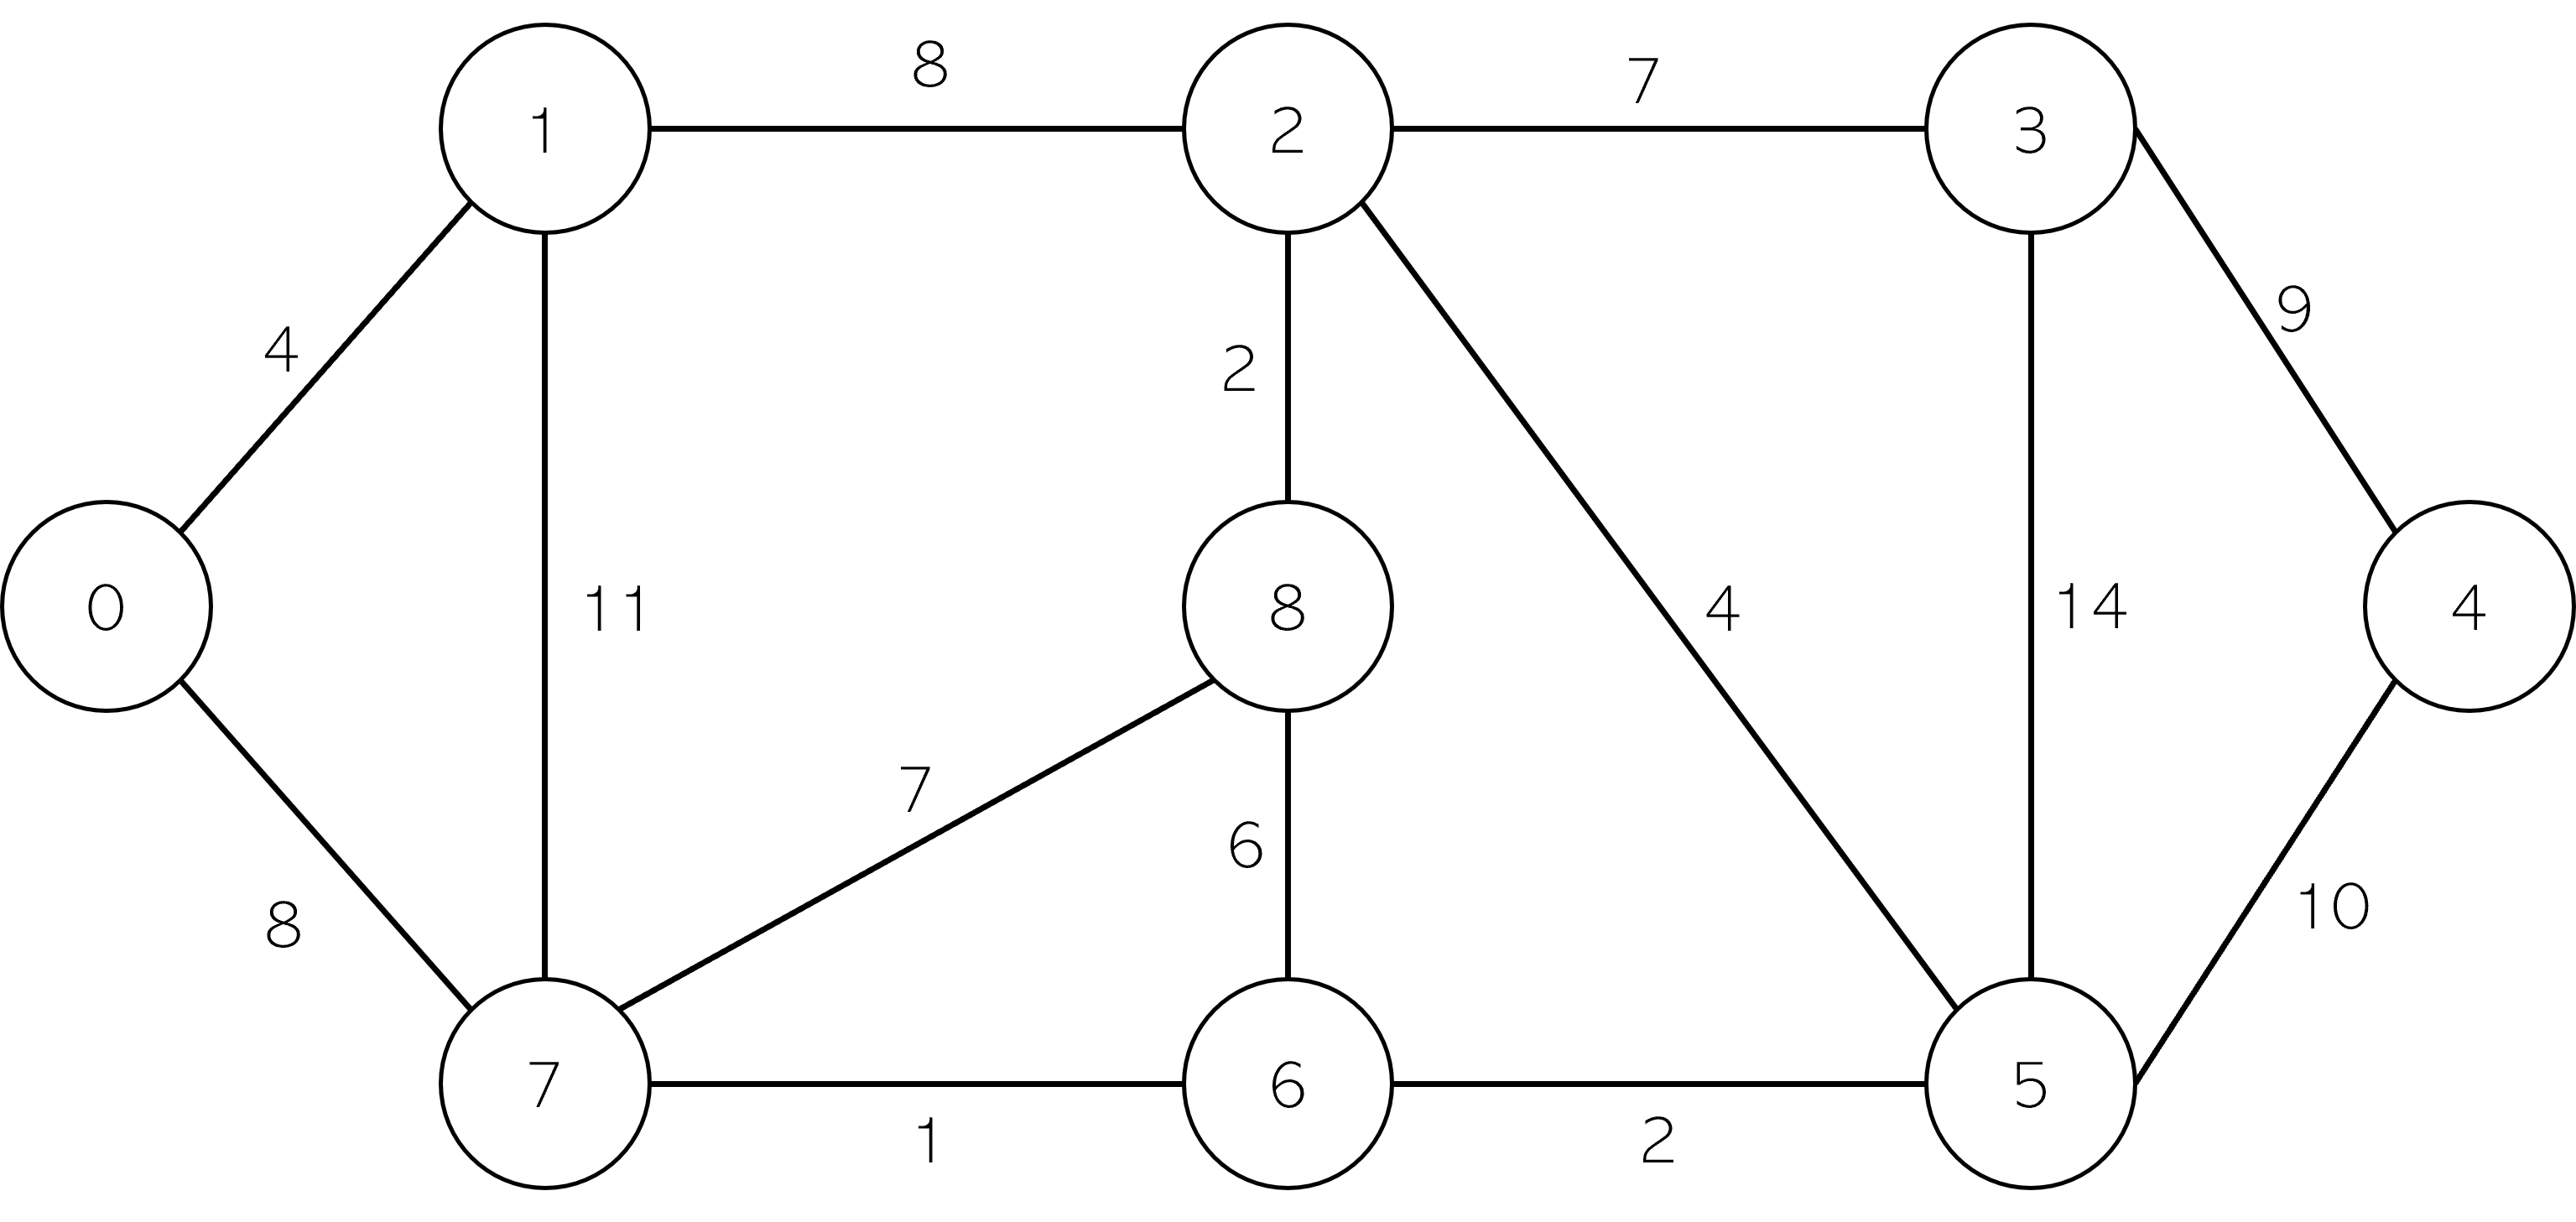

In [ ]:
# driver code
g= Graph()

graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
		[4, 0, 8, 0, 0, 0, 0, 11, 0],
		[0, 8, 0, 7, 0, 4, 0, 0, 2],
		[0, 0, 7, 0, 9, 14, 0, 0, 0],
		[0, 0, 0, 9, 0, 10, 0, 0, 0],
		[0, 0, 4, 14, 10, 0, 2, 0, 0],
		[0, 0, 0, 0, 0, 2, 0, 1, 6],
		[8, 11, 0, 0, 0, 0, 1, 0, 7],
		[0, 0, 2, 0, 0, 0, 6, 7, 0]
		]

# Print the solution
optimal_path = g.dijkstra(graph,0,4)
print(optimal_path)

[0, 7, 6, 5, 4]
[0, 1]


### Uni-directional K shortest path 
### (K < len(optimal_path))

In [ ]:
def copy_graph(graph):
    new_graph = []
    for m in range(len(graph)):
        new_graph.append([])
        for n in range(len(graph[m])):
            new_graph[m].append(graph[m][n])
    return new_graph

In [ ]:
def find_cost_of_opt_path(path, graph):

    sum = 0
    for i in range(1, len(path)):
        sum += graph[path[i-1]][path[i]]
    return sum

In [ ]:
import collections, random

def get_opt_paths(graph, src, dest, k):
    k_optimal_paths = [] # list of optimal paths
    k_optimal_paths.append(g.dijkstra(graph,src,dest))


    for j in range(1, len(k_optimal_paths[0])):
        # deep copy graph
        new_graph = copy_graph(graph)

        new_graph[k_optimal_paths[0][j-1]][k_optimal_paths[0][j]] = 0
        new_graph[k_optimal_paths[0][j]][k_optimal_paths[0][j-1]] = 0

        k_optimal_paths.append(g.dijkstra(new_graph,src,dest))

    # Assert if path include identical itinerary
    alt_paths = [] # add all alternative paths here, irrespective of the cost
    to_be_deleted_paths = [] # add all duplicate index here
    if k > 2:
        for i in range(2, len(k_optimal_paths)):

            for j in range(1, i):
                if collections.Counter(k_optimal_paths[i]) == collections.Counter(k_optimal_paths[j]):
                    to_be_deleted_paths.append(i)

                    for k in range(1, len(k_optimal_paths[j]) - 1):
                        new_graph = copy_graph(graph)

                        new_graph[k_optimal_paths[0][i-1]][k_optimal_paths[0][i]] = 0
                        new_graph[k_optimal_paths[0][i]][k_optimal_paths[0][i-1]] = 0

                        new_graph[k_optimal_paths[j][k-1]][k_optimal_paths[j][k]] = 0
                        new_graph[k_optimal_paths[j][k]][k_optimal_paths[j][k-1]] = 0

                        temp_lst = g.dijkstra(new_graph,src,dest)
                        if (temp_lst not in k_optimal_paths) and (temp_lst not in alt_paths):
                            alt_paths.append(temp_lst)
    
    # remove duplicate itinerary
    opt_paths = []
    for i in range(len(k_optimal_paths)):
        if i not in to_be_deleted_paths:
            opt_paths.append(k_optimal_paths[i])
    # print()

    # add all alternative paths at the end
    opt_paths.extend(alt_paths)

    # Sort based on costs
    costs = [] # cost of all itinerary; not sorted
    for i in opt_paths:
        costs.append(find_cost_of_opt_path(i, graph))

    for i in range(len(costs)-1):
        for j in range(i+1, len(costs)):
            if costs[i] > costs[j]:
                temp = costs[i]
                costs[i] = costs[j]
                costs[j] = temp

                temp = opt_paths[i]
                opt_paths[i] = opt_paths[j]
                opt_paths[j] = temp

    return opt_paths

In [ ]:
# driver code
g= Graph()

graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
		[4, 0, 8, 0, 0, 0, 0, 11, 0],
		[0, 8, 0, 7, 0, 4, 0, 0, 2],
		[0, 0, 7, 0, 9, 14, 0, 0, 0],
		[0, 0, 0, 9, 0, 10, 0, 0, 0],
		[0, 0, 4, 14, 10, 0, 2, 0, 0],
		[0, 0, 0, 0, 0, 2, 0, 1, 6],
		[8, 11, 0, 0, 0, 0, 1, 0, 7],
		[0, 0, 2, 0, 0, 0, 6, 7, 0]
		]

k = 4
optimal_paths = get_opt_paths(graph, 0, 4, k)
uni_k_opt_paths =  optimal_paths[:k]
print(uni_k_opt_paths)


[[0, 7, 6, 5, 4], [0, 1, 2, 5, 4], [0, 1, 2, 3, 4], [0, 7, 8, 2, 5, 4]]


### Bidirectional K Shortest Paths

In [ ]:
def swap_src_target_in_graph(graph):
    new_graph = copy_graph(graph)
    for i in range(len(graph)):
        if i == src or i == target:
            for j in range(len(graph[0])):
                if new_graph[i][j] != 0:
                    new_graph[i][j], new_graph[j][i] = 0, 0

    for i in range(len(graph[src])):
        if graph[src][i] != 0:
            new_graph[target][i], new_graph[i][target] = graph[src][i], graph[src][i]

    for i in range(len(graph[target])):
        if graph[target][i] != 0:
            new_graph[src][i], new_graph[i][src] = graph[target][i], graph[target][i]
    return new_graph

In [ ]:
# driver code

g= Graph()

graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
		[4, 0, 8, 0, 0, 0, 0, 11, 0],
		[0, 8, 0, 7, 0, 4, 0, 0, 2],
		[0, 0, 7, 0, 9, 14, 0, 0, 0],
		[0, 0, 0, 9, 0, 10, 0, 0, 0],
		[0, 0, 4, 14, 10, 0, 2, 0, 0],
		[0, 0, 0, 0, 0, 2, 0, 1, 6],
		[8, 11, 0, 0, 0, 0, 1, 0, 7],
		[0, 0, 2, 0, 0, 0, 6, 7, 0]
		]

k = 4
src = 0
target = 4

## forward directional k -shortest path
optimal_paths = get_opt_paths(graph, src, target, k)
forward_k_opt_paths =  optimal_paths[:k]
print("forward_k_opt_paths:\t", forward_k_opt_paths)

## backward directional k -shortest path

## swap the src target rows in graph because dijkstra cannot assign src > target 
new_graph = swap_src_target_in_graph(graph)
optimal_paths = get_opt_paths(new_graph, src, target, k)

# adjustment of soruce and target nodes
for path in optimal_paths:
    for j in range(len(path)):
        if path[j] == src:
            path[j] = target
        elif path[j] == target:
            path[j] = src

backward_k_opt_paths =  optimal_paths[:k]
print("backward_k_opt_paths:\t",backward_k_opt_paths)


forward_k_opt_paths:	 [[0, 7, 6, 5, 4], [0, 1, 2, 5, 4], [0, 1, 2, 3, 4], [0, 7, 8, 2, 5, 4]]

backward_k_opt_paths:	 [[4, 5, 6, 7, 0], [4, 5, 2, 1, 0], [4, 3, 2, 1, 0], [4, 5, 6, 7, 1, 0]]


In [ ]:
# dict to save forward and backward paths and their cost

forward_costs = []
for path in forward_k_opt_paths:
    forward_costs.append(find_cost_of_opt_path(path, graph))
print(forward_costs)
    
backward_costs = []
for path in backward_k_opt_paths:
    path.reverse()
    backward_costs.append(find_cost_of_opt_path(path, graph))
print(backward_costs)

[21, 26, 28, 31]
[21, 26, 28, 28]


### Bidirectional K-shortest Path for Additive Matrics

In [ ]:
def generate_multi_constarint_graph(graph):
    new_graph = copy_graph(graph)

    updated_pairs = []

    for i in range(len(graph)):
        for j in range(len(graph[0])):
            if ((i,j) not in updated_pairs) and ((j, i) not in updated_pairs):
                if graph[i][j] == 0:
                    new_graph[i][j], new_graph[j][i]  = [0,0,0], [0,0,0]
                else:
                    new_graph[i][j] = [graph[i][j], random.randint(1, graph[i][j]) , random.randint(graph[i][j],graph[i][j]+20)]
                    new_graph[j][i] = new_graph[i][j]
                
                updated_pairs.append((i,j))
                updated_pairs.append((j,i))

    return new_graph

multi_constraint_graph = generate_multi_constarint_graph(graph)
for i in multi_constraint_graph:
    print(i)

In [ ]:
def bidir_multi_constraint_k_shortest_path(k, src, target, multi_constraint_graph):
    graphs = []
    for k in range(len(multi_constraint_graph[0][0])):
        graphs.append([])
        for i in range(len(multi_constraint_graph)):
            graphs[k].append([])
            for j in range(len(multi_constraint_graph[0])):
                graphs[k][i].append(multi_constraint_graph[i][j][k])

    all_opt_paths = []
    all_opt_paths_costs = []

    for graph in graphs:

        ## forward directional k -shortest path
        optimal_paths = get_opt_paths(graph, src, target, k)
        forward_k_opt_paths =  optimal_paths[:k]
        all_opt_paths.extend(forward_k_opt_paths)

        ## backward directional k -shortest path

        ## swap the src target rows in graph because dijkstra cannot assign src > target 
        new_graph = swap_src_target_in_graph(graph)
        optimal_paths = get_opt_paths(new_graph, src, target, k)

        # adjustment of soruce and target nodes
        for path in optimal_paths:
            for j in range(len(path)):
                if path[j] == src:
                    path[j] = target
                elif path[j] == target:
                    path[j] = src

        backward_k_opt_paths =  optimal_paths[:k]
        for path in backward_k_opt_paths:
            path.reverse()
            all_opt_paths.append(path)

    # print("all_opt_paths")
    # print(all_opt_paths)

    uniq_opt_paths = []
    for i in all_opt_paths:
        if i not in uniq_opt_paths:
            uniq_opt_paths.append(i)

    # Sort based on costs on all graphs
    costs = [] # cost of all itinerary; not sorted
    for i in uniq_opt_paths:
        temp_cost_lst = []
        for graph in graphs:
            temp_cost_lst.append(find_cost_of_opt_path(i, graph))
        costs.append(temp_cost_lst)
    
    min_costs = [sum(x) for x in costs]

    for i in range(len(min_costs)-1):
        for j in range(i+1, len(min_costs)):
            if min_costs[i] > min_costs[j]:
                temp = min_costs[i]
                min_costs[i] = min_costs[j]
                min_costs[j] = temp

                temp = uniq_opt_paths[i]
                uniq_opt_paths[i] = uniq_opt_paths[j]
                uniq_opt_paths[j] = temp


    # print("uniq_opt_paths")
    # print(uniq_opt_paths)

    return uniq_opt_paths

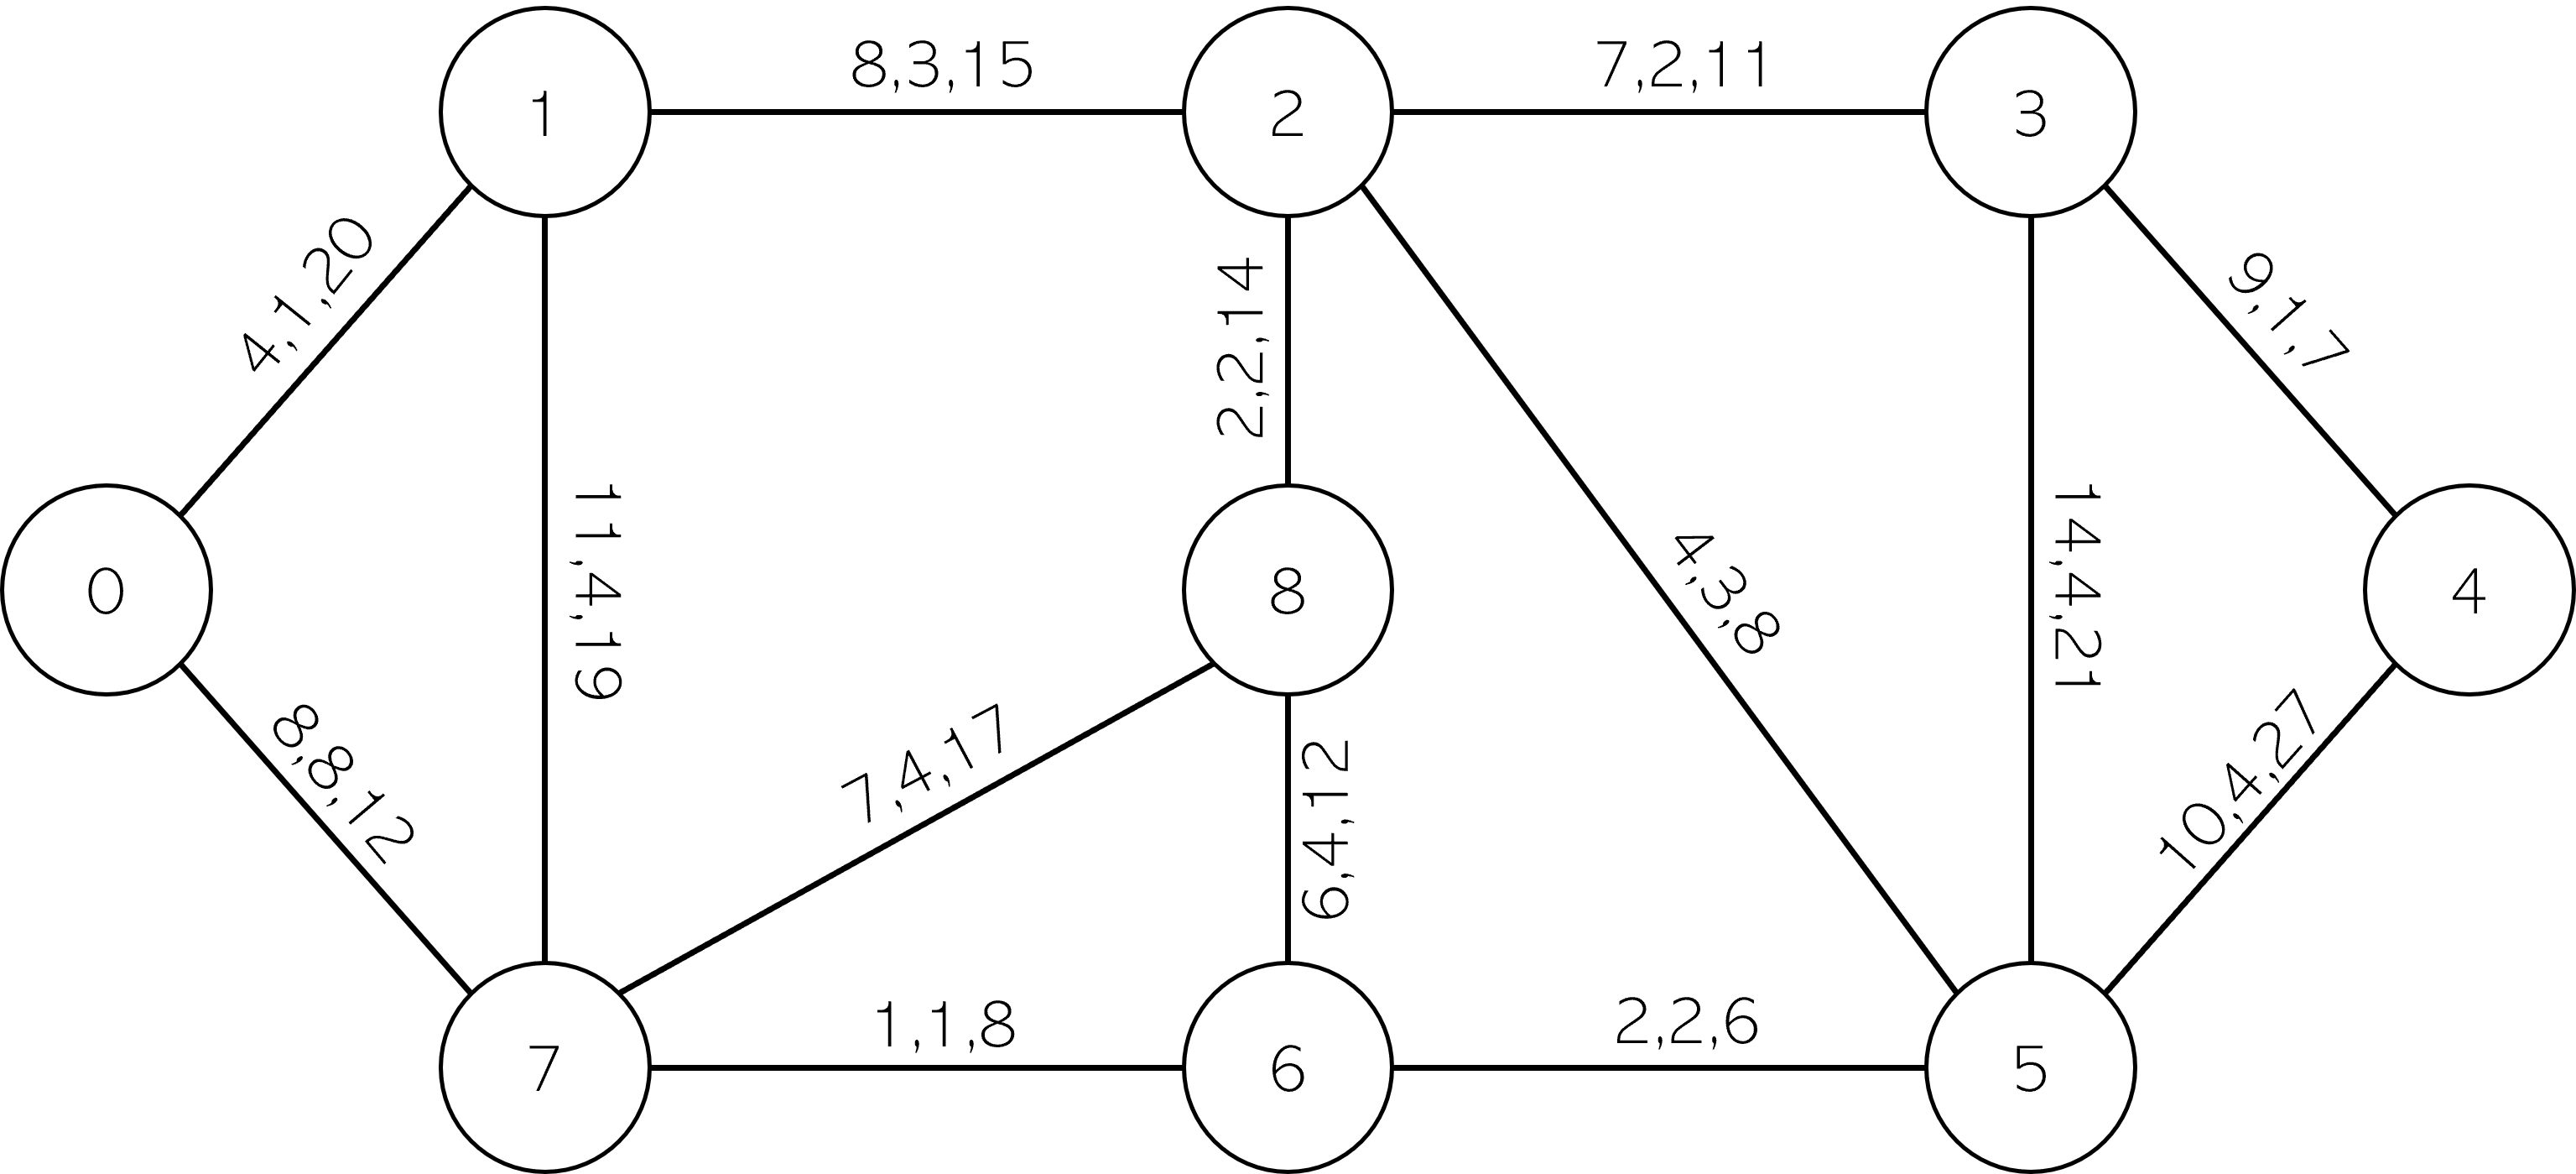

In [ ]:
g= Graph()

multi_constraint_graph = [
                            [[0, 0, 0], [4, 1, 20], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [8, 8, 12], [0, 0, 0]],
                            [[4, 1, 20], [0, 0, 0], [8, 3, 15], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [11, 4, 19], [0, 0, 0]],
                            [[0, 0, 0], [8, 3, 15], [0, 0, 0], [7, 2, 11], [0, 0, 0], [4, 3, 8], [0, 0, 0], [0, 0, 0], [2, 2, 14]],
                            [[0, 0, 0], [0, 0, 0], [7, 2, 11], [0, 0, 0], [9, 1, 17], [14, 4, 21], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
                            [[0, 0, 0], [0, 0, 0], [0, 0, 0], [9, 1, 17], [0, 0, 0], [10, 4, 27], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
                            [[0, 0, 0], [0, 0, 0], [4, 3, 8], [14, 4, 21], [10, 4, 27], [0, 0, 0], [2, 2, 6], [0, 0, 0], [0, 0, 0]],
                            [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [2, 2, 6], [0, 0, 0], [1, 1, 8], [6, 4, 12]],
                            [[8, 8, 12], [11, 4, 19], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 8], [0, 0, 0], [7, 4, 17]],
                            [[0, 0, 0], [0, 0, 0], [2, 2, 14], [0, 0, 0], [0, 0, 0], [0, 0, 0], [6, 4, 12], [7, 4, 17], [0, 0, 0]]
                        ]
k = 4
src = 0
target = 4

k_uniq_opt_paths = bidir_multi_constraint_k_shortest_path(k, src, target, multi_constraint_graph)
print(k_uniq_opt_paths)

[[0, 7, 6, 5, 4], [0, 1, 2, 3, 4], [0, 1, 2, 5, 4], [0, 7, 6, 5, 2, 3, 4]]
